<a href="https://colab.research.google.com/github/RaoSharjeelKhan/Machine-Learning/blob/main/Microsoft_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np

In [20]:
df=pd.read_csv('Microsoft_Stock.csv',index_col='Date',parse_dates=['Date'])
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1511 entries, 2015-04-01 16:00:00 to 2021-03-31 16:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1511 non-null   float64
 1   High    1511 non-null   float64
 2   Low     1511 non-null   float64
 3   Close   1511 non-null   float64
 4   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 70.8 KB


In [22]:
#checking the null values
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [23]:
df.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

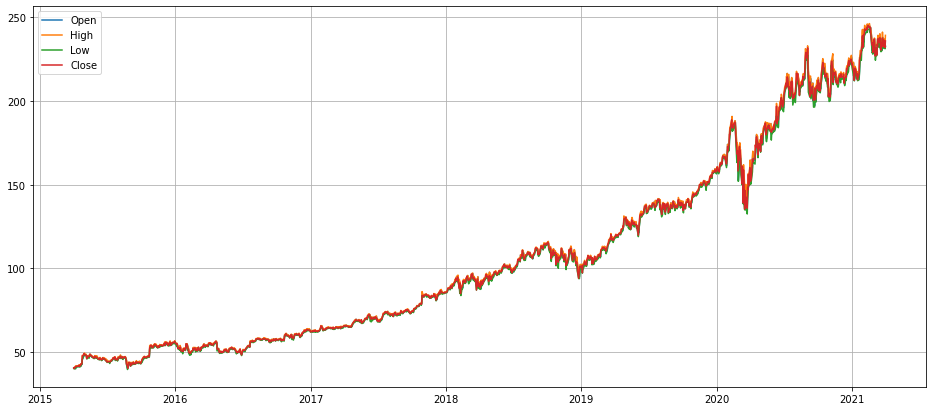

In [25]:
plt.figure(figsize=(16,7))
plt.plot(df['Open'],label='Open')
plt.plot(df['High'],label='High')
plt.plot(df['Low'],label='Low')
plt.plot(df['Close'],label='Close')
plt.legend()
plt.grid()

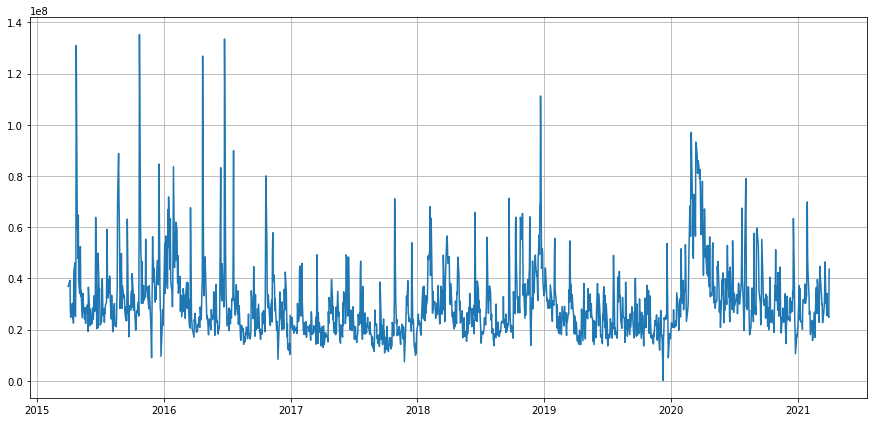

In [26]:
#Let see the Volume Column
plt.figure(figsize=(15,7))
plt.plot(df.Volume)
plt.grid()
plt.show()

In [27]:
from statsmodels.tsa.stattools import adfuller
df_test=adfuller(df['Close'],autolag='AIC')
print('p_value: ',df_test[1])
if (df_test[1]>0.05):
  print('-> Data is non-stationary')
else:
  print('-> Data is stationary')

p_value:  0.9982158366942122
-> Data is non-stationary


In [28]:
#First lets use differencing and check whether this method work or not
df['df_1']=df['Close'].diff(periods=1)
df.head()

,Open,High,Low,Close,Volume,df_1
Date,,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322,NaN
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476,-0.43
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692,1.26
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375,-0.02
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438,-0.11


In [38]:
df=df.dropna()
df.head()

,Open,High,Low,Close,Volume,df_1
Date,,,,,,
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476,-0.43
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692,1.26
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375,-0.02
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438,-0.11
2015-04-09 16:00:00,41.25,41.62,41.25,41.48,25723861,0.06


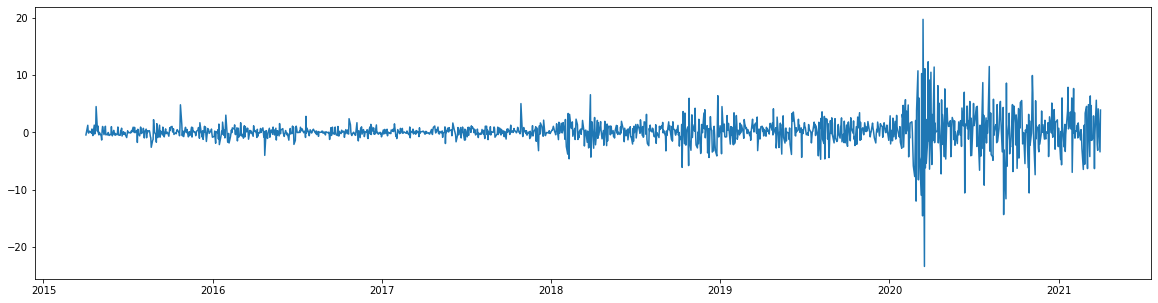

In [74]:
plt.figure(figsize=(20,5))
plt.plot(df['df_1'])


In [75]:
df_newtest=adfuller(df['df_1'],autolag='AIC')
df_newtest[1]

1.5195939917533584e-17

Good now our value is less than 0.05

In [97]:
from pmdarima import auto_arima
int_fit=auto_arima(df['df_1'],trace=True,suppress_warnings=True)
int_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=6761.238, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=6876.786, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=6760.385, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=6770.738, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6879.320, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=6762.379, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=6762.380, Time=0.25 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=6764.095, Time=0.57 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=6766.263, Time=0.06 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 2.343 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1510
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -3377.192
Date:                Sun, 16 Oct 2022   AIC                           6760.385
Time:                        13:08:58   BIC                           6776.345
Sample:                             0   HQIC                          6766.328
                               - 1510                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1641      0.059      2.788      0.005       0.049       0.280
ar.L1         -0.2748      0.010    -28.723      0.000      -0.294      -0.256
sigma2         5.1303      0.074     69.006      0.000       4.985       5.276
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9082.00
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              20.43   Skew:                            -0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
from statsmodels.tsa.arima.model import ARIMA


In [78]:
df.shape

(1510, 6)

In [79]:
train_df=df[:1470]
test_df=df[1470:]
train_df.shape,test_df.shape

((1470, 6), (40, 6))

In [104]:
model=ARIMA(train_df['df_1'],order=(5,1,8))
model=model.fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   df_1   No. Observations:                 1470
Model:                 ARIMA(5, 1, 8)   Log Likelihood               -3228.512
Date:                Sun, 16 Oct 2022   AIC                           6485.024
Time:                        13:15:30   BIC                           6559.116
Sample:                             0   HQIC                          6512.655
                               - 1470                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5751      0.444     -3.545      0.000      -2.446      -0.704
ar.L2         -1.2036      0.639     -1.883      0.060      -2.456       0.049
ar.L3         -1.0802      0.439     -2.459      0.014      -1.941      -0.219
ar.L4         -0.9148      0.329     -2.779      0.005      -1.560      -0.270
ar.L5         -0.2083      0.222     -0.939      0.348      -0.643       0.226
ma.L1          0.3388      0.444      0.763      0.446      -0.532       1.210
ma.L2         -0.4411      0.134     -3.283      0.001      -0.704      -0.178
ma.L3          0.0543      0.280      0.194      0.846      -0.495       0.603
ma.L4         -0.1599      0.099     -1.613      0.107      -0.354       0.034
ma.L5         -0.7185      0.118     -6.098      0.000      -0.949      -0.488
ma.L6         -0.1215      0.234     -0.519      0.604      -0.581       0.338
ma.L7          0.0885      0.024      3.735      0.000       0.042       0.135
ma.L8         -0.0334      0.043     -0.780      0.435      -0.117       0.051
sigma2         4.7330      0.077     61.083      0.000       4.581       4.885
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              8096.21
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):              17.98   Skew:                            -0.62
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [105]:
start=len(train_df)
end=len(train_df)+len(test_df)-1
pred=model.predict(start=start,end=end,type='levels')
pred.index=df.index[start:end+1]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


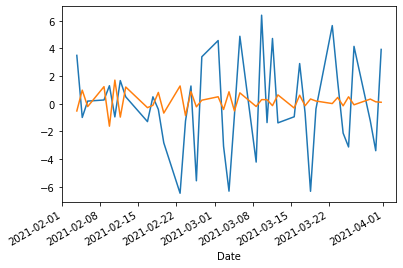

In [106]:
test_df['df_1'].plot(label='Test')
pred.plot(label='Test')